In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def calc_fitness(chromosome, target_rgb):
    """
    Calculate the fitness of a given chromosome.
    Parameters are the chromosome selected from population and the target rgb value.
    Returns The mean absolute difference between the chromosome and target RGB values.
    """
    return np.mean(np.abs(chromosome - target_rgb))

In [3]:
def evolve_population(population, target_rgb, mutation_rate, elite_ratio):

    # Calculate fitness values for each chromosome in the population using the function defined earlier
    fitness_values = [calc_fitness(c, target_rgb) for c in population]

    # Select the chromosomes with the best fitness values as elites
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]
    elites = [population[i] for i in elite_index]

    # Create a new population by mating the elites
    new_population = []
    while len(new_population) < len(population) - len(elites):
        # Select two parents randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Create a child chromosome by combining the genes of the two parents
        child = np.zeros(parent1.shape)
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child[i] = parent1[i]
            else:
                child[i] = parent2[i]

            # Mutate the child chromosome with a probability determined by mutation_rate
            if random.random() < mutation_rate:
                child[i] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

      # Return the evolved population
    return elites + new_population

In [4]:
def simulate(size, target_rgb, generations, mutation_rate, elite_ratio):

    #Simulate the evolution of a population of chromosomes.


        #size - The size of the population.
        #target_rgb - The target RGB values.
        #generations - The number of generations to evolve the population.
        #mutation_rate - The probability of a chromosome mutating.
        #elite_ratio - The ratio of chromosomes to be selected as elites.

        #np.ndarray: The best chromosome found.

    # Initialize the population with random RGB values
    population = [np.random.randint(0, 256, size=(3,)) for _ in range(size)]

    # Evolve the population over the specified number of generations
    for i in range(generations):
        # Evolve the population by selecting elites, mutating, and recombining
        population = evolve_population(population, target_rgb, mutation_rate, elite_ratio)

        # Get the individual with the best fitness (closest to target RGB)
        best_fit = min(population, key=lambda c: calc_fitness(c, target_rgb))

        # Print the generation number and the RGB values and fitness of the best individual
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_rgb)}, RGB values {best_fit}')

    # Return the individual with the minimum fitness value
    return min(population, key=lambda c: calc_fitness(c, target_rgb))

In [8]:
target_rgb = np.array([50, 0, 0])
best_camouflage = simulate(300, target_rgb, 100, 0.01, 0.1)

print("Target is %s and the best campuflage is %s ." % (target_rgb, best_camouflage))

Generation 0: Best fitness 7.0, RGB values [31.  2.  0.]
Generation 1: Best fitness 2.3333333333333335, RGB values [49.  2.  4.]
Generation 2: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 3: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 4: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 5: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 6: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 7: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 8: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 9: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 10: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 11: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 12: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Generation 13: Best fitness 0.6666666666666666, RGB values [50.  2.  0.]
Gen

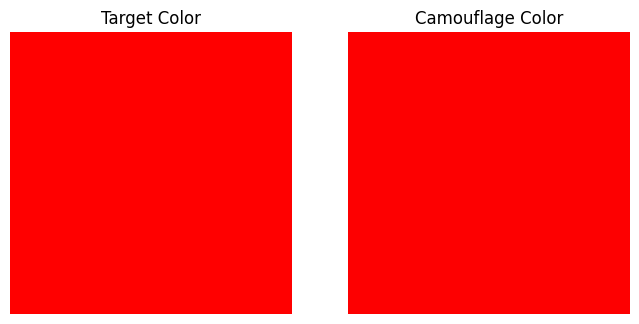

In [7]:
# Create a figure and axis to plot the RGB values
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot each RGB value in its own axis
ax[0].imshow(np.reshape(target_rgb/255, (1, 1, 3)))
ax[1].imshow(np.reshape(best_camouflage/255, (1, 1, 3)))

# Remove the axis labels and grid
ax[0].axis("off")
ax[1].axis("off")

#Add titles
ax[0].set_title("Target Color")
ax[1].set_title("Camouflage Color")
# Show the plot
plt.show()

# Same Exapmple with 2-D Images

In [9]:
def calc_fitness(chromosome, target_grid):
    return np.mean(np.abs(chromosome - target_grid))

In [10]:
def evolve_population(population, target_grid, mutation_rate, elite_ratio):

    # Calculate fitness values for each chromosome in the population
    fitness_values = [calc_fitness(c, target_grid) for c in population]

    # Determine the indices of the best chromosomes (elites)
    elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]

    # Select the best chromosomes (elites) from the population
    elites = [population[i] for i in elite_index]

    # Initialize the new population
    new_population = []

    # Create new offspring by breeding the elites
    while len(new_population) < len(population) - len(elites):
        # Select two parent chromosomes randomly from the elites
        parent1, parent2 = random.choices(elites, k=2)

        # Initialize the child chromosome
        child = np.zeros(parent1.shape)

         # Loop through the elements of the parent chromosomes
        for i in range(len(parent1)):
            for j in range(len(parent1[i])):
                for k in range(len(parent1[i][j])):
                    # Randomly inherit the element from either parent
                    if random.random() < 0.5:
                        child[i][j][k] = parent1[i][j][k]
                    else:
                        child[i][j][k] = parent2[i][j][k]

                    # Mutate the element with a certain probability
                    if random.random() < mutation_rate:
                        child[i][j][k] = np.random.randint(0, 256)

        # Add the child chromosome to the new population
        new_population.append(child)

    # Combine the elites and the offspring to form the evolved population
    return elites + new_population

In [11]:
images =[]
def simulate(size, target_grid, generations, mutation_rate, elite_ratio):
    """
    This function simulates the evolutionary process to generate new images.

    Parameters:
    size (int) : The size of the population.
    target_grid (numpy array) : The target image for the evolutionary process.
    generations (int) : The number of generations to run the simulation for.
    mutation_rate (float) : The rate of mutation of the images in the population.
    elite_ratio (float) : The ratio of the population that will be considered as elites.

    Returns:
    (tuple) : A tuple of the best image generated by the simulation and a list of all images generated in the simulation.
    """
    # The size of each image in the population
    grid_size = (16, 16, 3)
    # initialize the population with random values
    population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]


    for i in range(generations):
      # evolve the population for each generation
        population = evolve_population(population, target_grid, mutation_rate, elite_ratio)
         # find the chromosome with the best fitness value
        best_fit = min(population, key=lambda c: calc_fitness(c, target_grid))
        # print the generation number and best fitness value
        print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_grid)}')

        # store the generated image
        images.append(best_fit.astype(np.uint8))


    # Return the best fit image and the list of all images
    return min(population, key=lambda c: calc_fitness(c, target_grid)), images

In [12]:
target_grid = np.zeros((16, 16, 3), dtype=np.uint8)
# Green grass [0, 154, 23]
target_grid[:] = [0, 154, 23]

pop_size = 300
num_generations = 100
mut_rate = 0.01
elite_ratio = 0.2
best_camouflage, images = simulate(pop_size, target_grid, num_generations, mut_rate, elite_ratio)

Generation 0: Best fitness 92.8671875
Generation 1: Best fitness 90.8984375
Generation 2: Best fitness 88.23828125
Generation 3: Best fitness 85.46223958333333
Generation 4: Best fitness 83.43880208333333
Generation 5: Best fitness 81.28255208333333
Generation 6: Best fitness 80.48567708333333
Generation 7: Best fitness 79.046875
Generation 8: Best fitness 76.39973958333333
Generation 9: Best fitness 75.02864583333333
Generation 10: Best fitness 73.07161458333333
Generation 11: Best fitness 71.34895833333333
Generation 12: Best fitness 69.88020833333333
Generation 13: Best fitness 66.90625
Generation 14: Best fitness 65.48567708333333
Generation 15: Best fitness 64.7890625
Generation 16: Best fitness 64.18229166666667
Generation 17: Best fitness 62.294270833333336
Generation 18: Best fitness 60.930989583333336
Generation 19: Best fitness 59.696614583333336
Generation 20: Best fitness 58.12890625
Generation 21: Best fitness 56.998697916666664
Generation 22: Best fitness 56.7473958333333

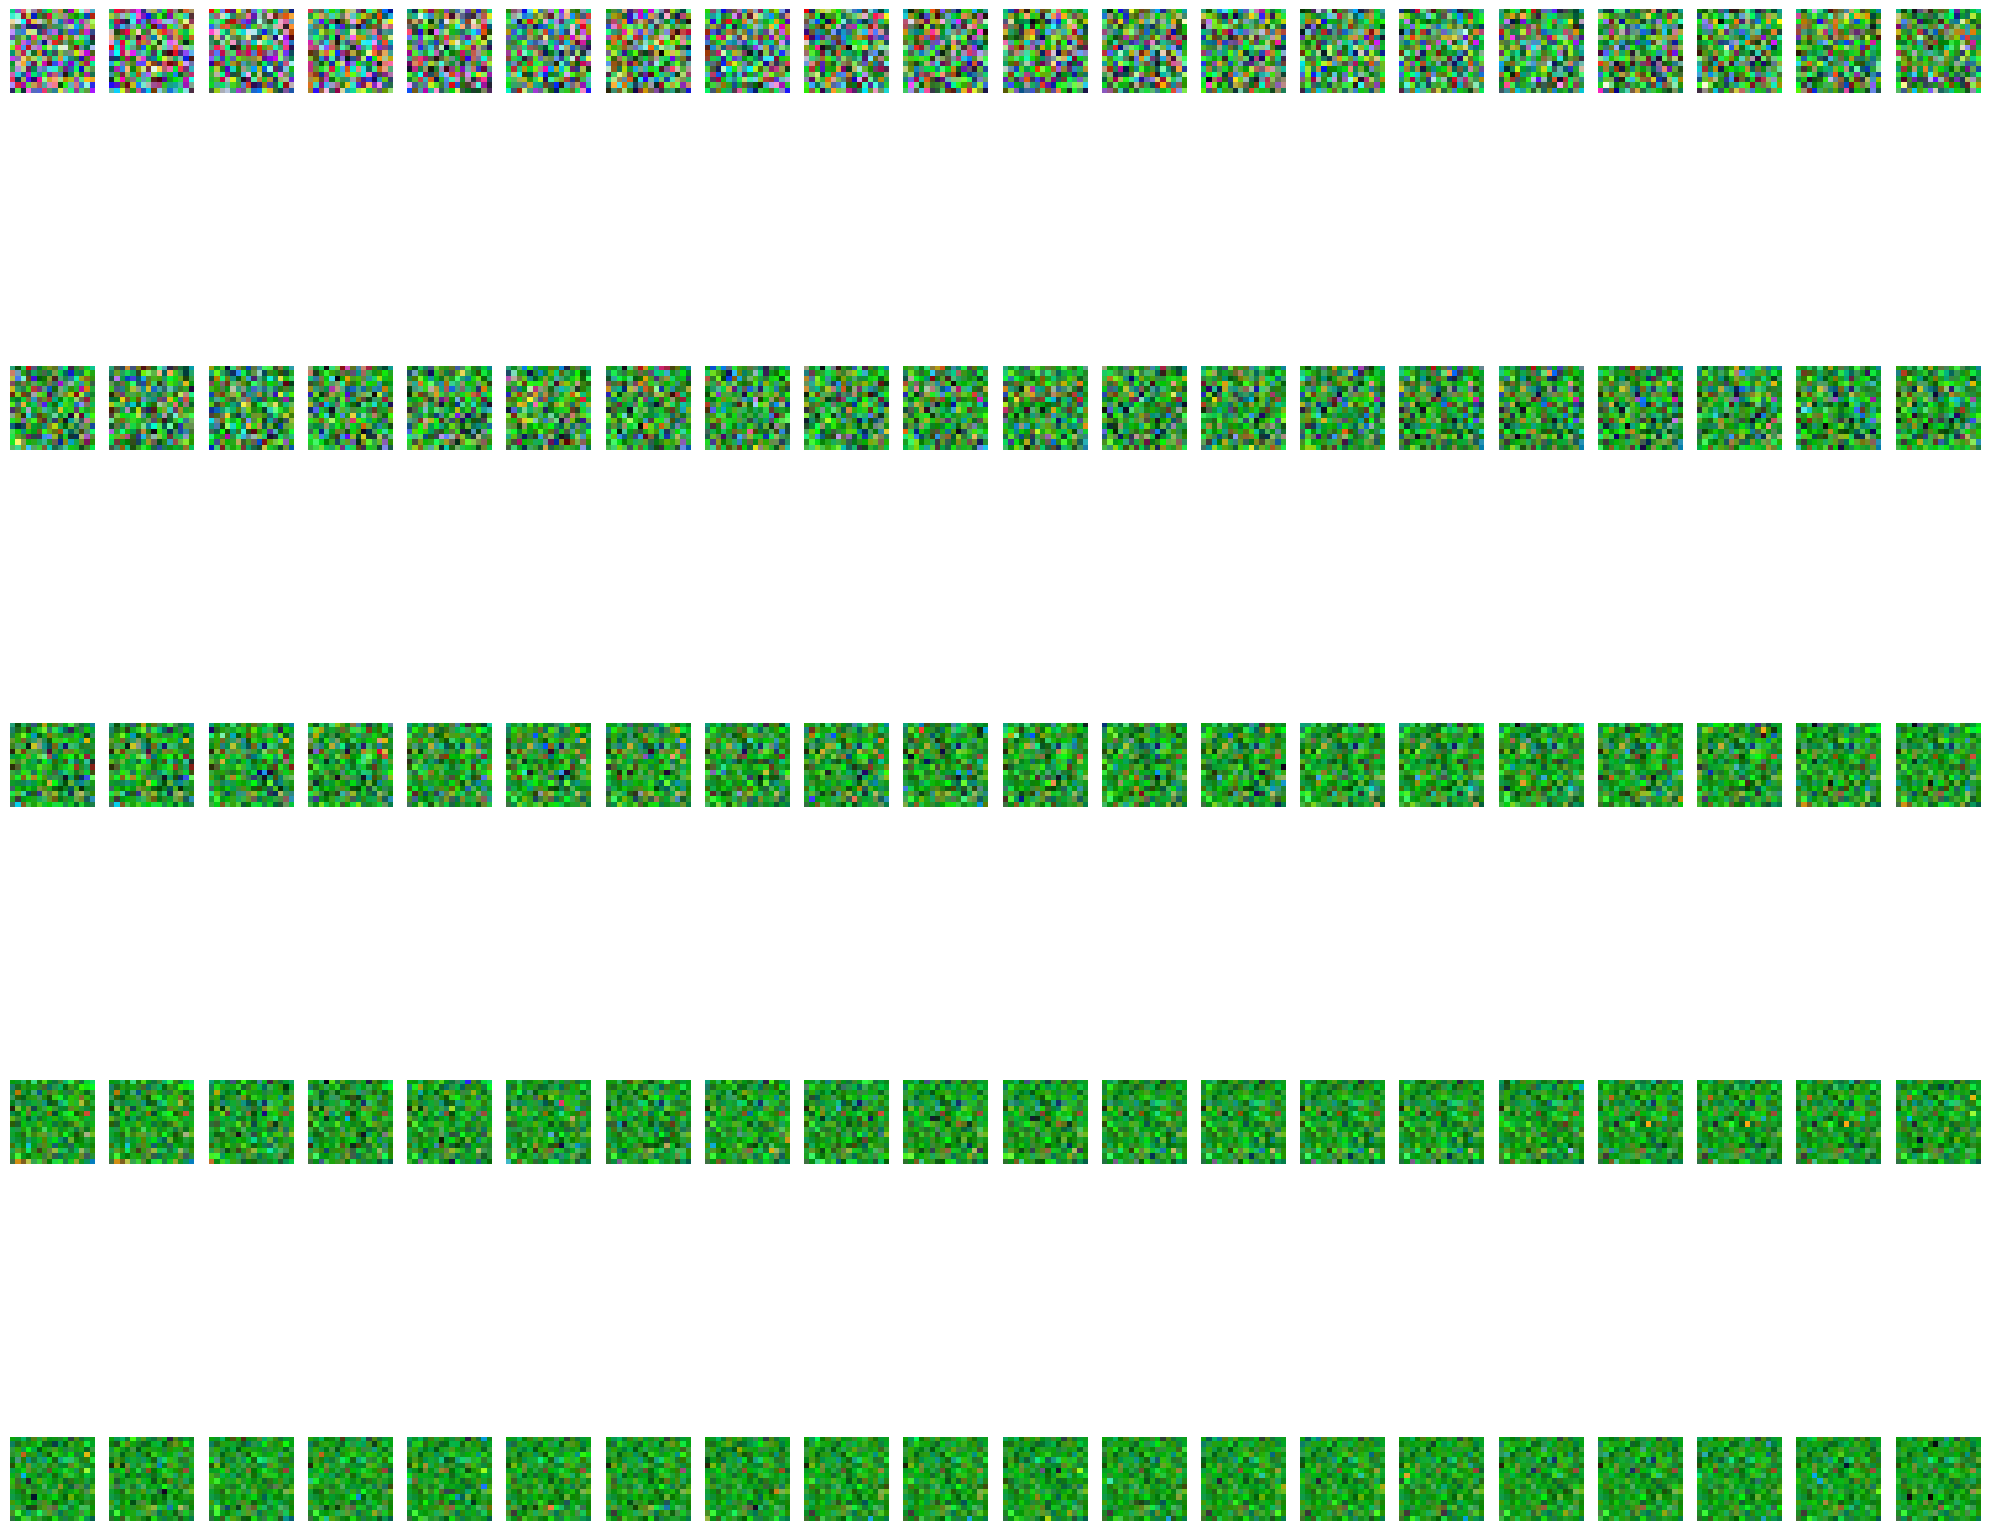

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Function to display a grid of images
def display_images(images, num_images=100, rows=10, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.ravel()):
        if i < num_images:
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

# Plot images:

display_images(images, rows=5, cols=20)